**Setup**

In [1]:
%pip install sdv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.6/125.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.8/169.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of sdmetrics to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 13.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_c

**Demo Datasets**

In [2]:
from sdv.datasets.demo import get_available_demos
get_available_demos(modality='single_table')

,dataset_name,size_MB,num_tables
0,KRK_v1,0.06,1
1,adult,3.91,1
2,alarm,4.52,1
3,asia,1.28,1
4,census,98.17,1
5,census_extended,4.95,1
6,child,3.20,1
7,covtype,255.65,1
8,credit,68.35,1
9,expedia_hotel_logs,0.20,1


**Importing Dataset**

In [3]:
from sdv.datasets.demo import download_demo
real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)

In [4]:
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


**Checking for Null/Nan data.**

In [5]:
real_data.isnull().sum()

guest_email            0
has_rewards            0
room_type              0
amenities_fee         45
checkin_date           0
checkout_date         20
room_rate              0
billing_address        0
credit_card_number     0
dtype: int64

**Droping NULL / Nan values.**

In [8]:
real_data.dropna(inplace=True)

In [9]:
real_data.isnull().sum()

guest_email           0
has_rewards           0
room_type             0
amenities_fee         0
checkin_date          0
checkout_date         0
room_rate             0
billing_address       0
credit_card_number    0
dtype: int64

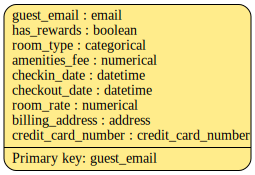

In [10]:
metadata.visualize()

**CTGAN Synthesizer**

In [14]:
from sdv.single_table import CTGANSynthesizer
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(real_data)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning: The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.
  warnings.warn(


**Getting the samples.**

In [15]:
synthetic_data=synthesizer.sample(num_rows=500)
synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,christophervazquez@example.com,False,BASIC,35.37,01 Jun 2020,07 Jan 2020,202.51,60945 Michelle Shoal Suite 594\nLake Tiffanymo...,3537187319841509
1,ronaldvega@example.net,False,BASIC,35.51,07 Jan 2021,23 Sep 2020,149.70,20642 Elizabeth Estates Suite 296\nMartinezbur...,376083247245584
2,martinjames@example.org,True,DELUXE,7.11,04 Jun 2020,22 Aug 2020,101.12,"217 Dennis Rapids\nAndrewville, AK 27423",4982613005565229369
3,banderson@example.org,False,BASIC,42.17,09 Nov 2020,03 Feb 2020,130.26,"89336 Simpson Common\nJasontown, AR 51668",3543023281234237
4,roy99@example.net,False,DELUXE,48.12,07 Jan 2021,29 Apr 2020,90.81,"88393 Rodriguez Inlet\nMirandashire, RI 11144",4240846717432429


**Checking for Null/NaN data.**

In [30]:
synthetic_data.isnull().sum()

guest_email           0
has_rewards           0
room_type             0
amenities_fee         0
checkin_date          0
checkout_date         0
room_rate             0
billing_address       0
credit_card_number    0
dtype: int64

**Evaluation**

In [16]:
from sdv.evaluation.single_table import run_diagnostic
diagnostic=run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...
(2/2) Evaluating Data Structure: : 100%|██████████| 1/1 [00:00<00:00, 161.86it/s]

Overall Score: 100.0%

Properties:
- Data Validity: 100.0%
- Data Structure: 100.0%


In [17]:
from sdv.evaluation.single_table import evaluate_quality
quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 106.21it/s]

Overall Score: 57.02%

Properties:
- Column Shapes: 73.38%
- Column Pair Trends: 40.67%


**Plot for Room type , Comparing Real and Fake data.**

In [19]:
from sdv.evaluation.single_table import get_column_plot
fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='room_type',
    metadata=metadata
)
fig.show()

In [25]:
from sdv.evaluation.single_table import get_column_plot
fig=get_column_plot(
    real_data=real_data,
    synthetic_data= synthetic_data,
    column_name='room_rate',
    metadata=metadata
)
fig.show()

In [26]:
from sdv.evaluation.single_table import get_column_plot
fig=get_column_plot(
    real_data=real_data,
    synthetic_data= synthetic_data,
    column_name='amenities_fee',
    metadata=metadata
)
fig.show()

In [29]:
from sdv.evaluation.single_table import get_column_plot
fig=get_column_plot(
    real_data=real_data,
    synthetic_data= synthetic_data,
    column_name='has_rewards',
    metadata=metadata
)
fig.show()

In [32]:
from sdv.evaluation.single_table import get_column_pair_plot
figure = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['room_rate', 'room_type'],
    metadata=metadata
)
figure.show()

In [40]:
from sdv.evaluation.single_table import get_column_pair_plot
figure=get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['room_rate','has_rewards'],
    metadata=metadata
)
figure.show()

**Training more -> Epochs = 500**

In [43]:
modify_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=500)
modify_synthesizer.fit(real_data)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/pii/anonymizer.py:118: FutureWarning:

The 'enforce_uniqueness' parameter is no longer supported. Please use the 'cardinality_rule' parameter instead.



**Improve Quality**

In [44]:
synthetic_data_customized =modify_synthesizer.sample(num_rows=500)
quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Generating report ...
(2/2) Evaluating Column Pair Trends: : 100%|██████████| 36/36 [00:00<00:00, 108.83it/s]

Overall Score: 60.45%

Properties:
- Column Shapes: 79.77%
- Column Pair Trends: 41.13%


Previous Score - **57.02%** &  
Present Score-  **60.45%**